In [259]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
)

%matplotlib inline

In [261]:
df_no_buffer = pd.read_csv(r'/Users/prakhars03/Library/CloudStorage/OneDrive-TheUniversityofChicago/Desktop/College+school/UChicago/Citadel Datathon/greenspace_data/percent_cover_tracts_no_buffer.csv')
df_with_buffer = pd.read_csv(r'/Users/prakhars03/Library/CloudStorage/OneDrive-TheUniversityofChicago/Desktop/College+school/UChicago/Citadel Datathon/greenspace_data/percent_cover_tracts_with_buffer.csv')
df_tract_redlining = pd.read_csv(r'/Users/prakhars03/Library/CloudStorage/OneDrive-TheUniversityofChicago/Desktop/College+school/UChicago/Citadel Datathon/greenspace_data/Historic Redlining Score 2020B.csv')
df_no_buffer

,GEOID20,STATEFP,COUNTYFP,pc_park
0,1055010700,1,55,4.423
1,1055001300,1,55,3.706
2,1055000900,1,55,1.037
3,1055001700,1,55,0.510
4,1055010501,1,55,9.279
...,...,...,...,...
72533,11001002101,11,1,7.469
72534,11001002900,11,1,0.436
72535,11001003100,11,1,0.475
72536,11001003200,11,1,1.751


Merging datasets by geoid

In [262]:
df_nobuff_redlining = pd.merge(df_tract_redlining, df_no_buffer[['GEOID20', 'pc_park']], on='GEOID20')
df_withbuff_redlining = pd.merge(df_tract_redlining, df_with_buffer[['GEOID20', 'pc_park']], on='GEOID20')
df_nobuff_redlining

,GEOID20,CBSA,METRO_NAME,HRS2020,INTERVAL2020,pc_park
0,1073010804,13820,"Birmingham-Hoover, AL",1.0,1,2.904
1,6001404501,41860,"San Francisco-Oakland-Hayward,",1.0,1,0.000
2,6001404600,41860,"San Francisco-Oakland-Hayward,",1.0,1,40.201
3,6001421100,41860,"San Francisco-Oakland-Hayward,",1.0,1,0.033
4,6037124000,31100,"Los Angeles-Long Beach, CA",1.0,1,0.000
...,...,...,...,...,...,...
11859,55079186600,33340,"Milwaukee-Waukesha-West Allis,",4.0,4,12.549
11860,55101000400,39540,"Racine, WI",4.0,4,4.190
11861,55139001000,36780,"Oshkosh-Neenah, WI",4.0,4,16.139
11862,55139001100,36780,"Oshkosh-Neenah, WI",4.0,4,0.417


Filtering by city

In [263]:
df_nobuff_redlining = df_nobuff_redlining[df_nobuff_redlining['METRO_NAME'].str.contains('Louisville')]
df_withbuff_redlining = df_withbuff_redlining[df_withbuff_redlining['METRO_NAME'].str.contains('Louisville')]
df_withbuff_redlining

,GEOID20,CBSA,METRO_NAME,HRS2020,INTERVAL2020,pc_park
42,21111009600,31140,"Louisville/Jefferson County, K",1.00,1,5.458
308,21111013100,31140,"Louisville/Jefferson County, K",1.13,1,4.215
313,21111008700,31140,"Louisville/Jefferson County, K",1.14,1,9.491
321,21111007501,31140,"Louisville/Jefferson County, K",1.15,1,5.151
354,21111008800,31140,"Louisville/Jefferson County, K",1.20,1,14.168
...,...,...,...,...,...,...
9972,21111001400,31140,"Louisville/Jefferson County, K",3.99,4,4.056
10755,21111002100,31140,"Louisville/Jefferson County, K",4.00,4,3.649
10756,21111002300,31140,"Louisville/Jefferson County, K",4.00,4,3.241
10757,21111003000,31140,"Louisville/Jefferson County, K",4.00,4,1.656


Checking for correlation at macro level

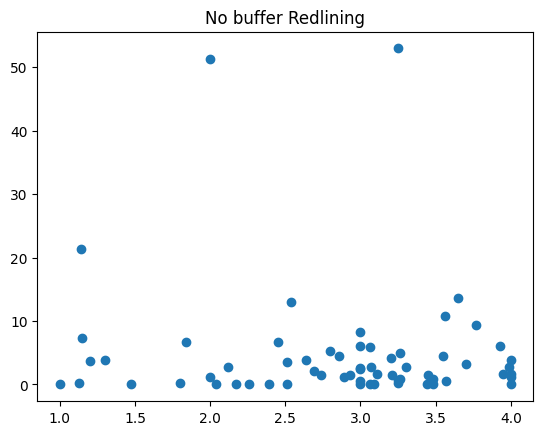

slope=-0.9097646831703304, intercept=7.383545556218214, r^2value=0.006153830989388305, pvalue=0.5411181158181966, stderr=1.4803041540476582 
 -----------------


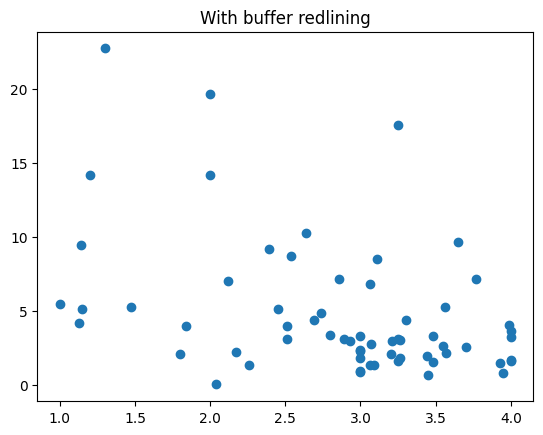

slope=-2.334511974406796, intercept=11.499849506778467, r^2value=0.17203294889238807, pvalue=0.0007253343741374168, stderr=0.65574033570186 
 -----------------


In [264]:
from scipy.stats import linregress

plt.scatter(x= df_nobuff_redlining['HRS2020'], y= df_nobuff_redlining['pc_park'])
plt.title("No buffer Redlining")
plt.show()

slope, intercept, rvalue, pvalue, stderr = linregress(df_nobuff_redlining['HRS2020'], df_nobuff_redlining['pc_park'])
print(f'slope={slope}, intercept={intercept}, r^2value={rvalue ** 2}, pvalue={pvalue}, stderr={stderr} \n -----------------')

plt.scatter(x= df_withbuff_redlining['HRS2020'], y= df_withbuff_redlining['pc_park'])
plt.title("With buffer redlining")
plt.show()

slope, intercept, rvalue, pvalue, stderr = linregress(df_withbuff_redlining['HRS2020'], df_withbuff_redlining['pc_park'])
print(f'slope={slope}, intercept={intercept}, r^2value={rvalue ** 2}, pvalue={pvalue}, stderr={stderr} \n -----------------')

